In [15]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [16]:
#Read the dataset
df=pd.read_csv('data\Air_quality_data_all_countries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    5400 non-null   object 
 1   timestamp  5400 non-null   object 
 2   AQI        5400 non-null   int64  
 3   co         5400 non-null   float64
 4   no         5400 non-null   float64
 5   no2        5400 non-null   float64
 6   o3         5400 non-null   float64
 7   so2        5400 non-null   float64
 8   pm2_5      5400 non-null   float64
 9   pm10       5400 non-null   float64
 10  nh3        5400 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 464.2+ KB


In [17]:
print(df['country'].unique())
df['country'].unique().shape

['Andorra' 'United Arab Emirates' 'Afghanistan' 'Albania' 'Anguilla'
 'Armenia' 'Netherlands Antilles' 'Angola' 'Antarctica' 'American Samoa'
 'Austria' 'Australia' 'Aruba' 'Azerbaijan' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Burundi' 'Benin' 'Bermuda' 'Brunei' 'Bolivia' 'Brazil' 'Bahamas'
 'Bhutan' 'Bouvet Island' 'Botswana' 'Belarus' 'Belize' 'Canada'
 'Cocos [Keeling] Islands' 'Congo [DRC]' 'Central African Republic'
 'Congo [Republic]' 'Switzerland' "Côte d'Ivoire" 'Cook Islands' 'Chile'
 'Cameroon' 'Colombia' 'Costa Rica']


(45,)

In [18]:
for country_name in df['country'].unique():
    country_count = df[df['country'] == country_name].shape[0]
    print(f'{country_name} appeared {country_count} times.')

Andorra appeared 120 times.
United Arab Emirates appeared 120 times.
Afghanistan appeared 120 times.
Albania appeared 120 times.
Anguilla appeared 120 times.
Armenia appeared 120 times.
Netherlands Antilles appeared 120 times.
Angola appeared 120 times.
Antarctica appeared 120 times.
American Samoa appeared 120 times.
Austria appeared 120 times.
Australia appeared 120 times.
Aruba appeared 120 times.
Azerbaijan appeared 120 times.
Bosnia and Herzegovina appeared 120 times.
Barbados appeared 120 times.
Bangladesh appeared 120 times.
Belgium appeared 120 times.
Burkina Faso appeared 120 times.
Bulgaria appeared 120 times.
Bahrain appeared 120 times.
Burundi appeared 120 times.
Benin appeared 120 times.
Bermuda appeared 120 times.
Brunei appeared 120 times.
Bolivia appeared 120 times.
Brazil appeared 120 times.
Bahamas appeared 120 times.
Bhutan appeared 120 times.
Bouvet Island appeared 120 times.
Botswana appeared 120 times.
Belarus appeared 120 times.
Belize appeared 120 times.
Canada 

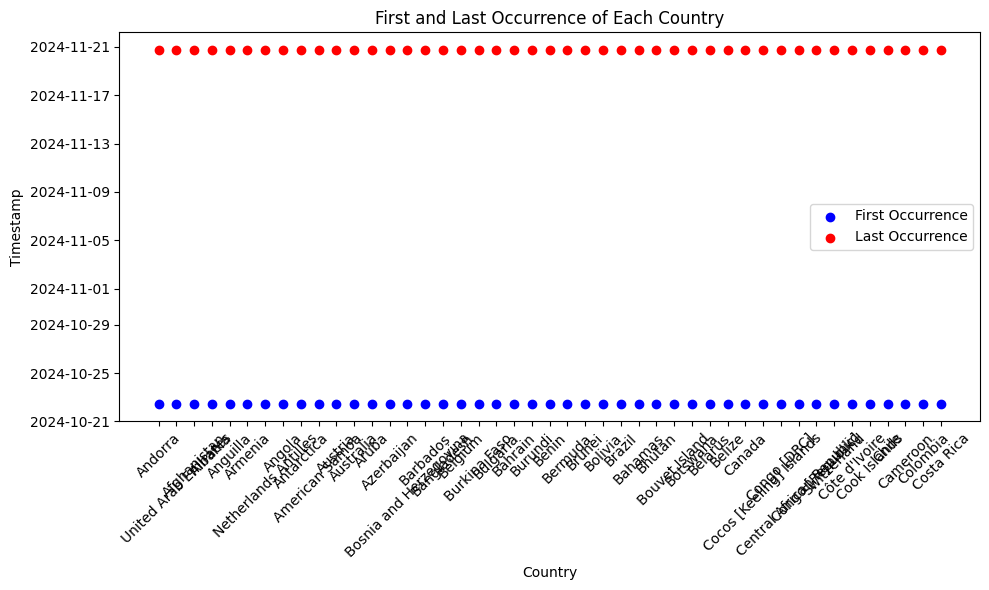

In [19]:
first_occurrences = []
last_occurrences = []
countries = []
for country_name in df['country'].unique():
    country_df = df[df['country'] == country_name]
    first_timestamp = pd.to_datetime(country_df['timestamp'].iloc[0])
    last_timestamp = pd.to_datetime(country_df['timestamp'].iloc[-1])

    countries.append(country_name)
    first_occurrences.append(first_timestamp)
    last_occurrences.append(last_timestamp)
    
plt.figure(figsize=(10, 6))
plt.scatter(countries, first_occurrences, color='blue', label='First Occurrence', zorder=5)
plt.scatter(countries, last_occurrences, color='red', label='Last Occurrence', zorder=5)

plt.xlabel('Country')
plt.ylabel('Timestamp')
plt.title('First and Last Occurrence of Each Country')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()    

This plot shows that for whatever country in the data, it first starts recording its metrics on 2024-10-21 and stops on 2024-11-21

In [20]:
columns_to_check = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
unique_values = {}
max_min = {}
for column in columns_to_check:
        if column in df.columns:
            # Get unique values, excluding NaN
            unique_values[column] = df[column].dropna().unique().tolist()
            max_min[column] = min(unique_values[column]), max(unique_values[column]) 
print(max_min)

{'co': (0.0, 4646.3), 'no': (0.0, 166.3), 'no2': (0.0, 130.24), 'o3': (0.0, 326.16), 'so2': (0.0, 154.5), 'pm2_5': (0.0, 377.98), 'pm10': (0.0, 459.73), 'nh3': (0.0, 79.04)}


In [21]:
print(df['no2'].isnull().sum())   
print((df['no2'] < 0).sum())  
print(df['no2'].describe())  

0
0
count    5400.000000
mean        3.835069
std         9.844302
min         0.000000
25%         0.100000
50%         0.610000
75%         2.740000
max       130.240000
Name: no2, dtype: float64


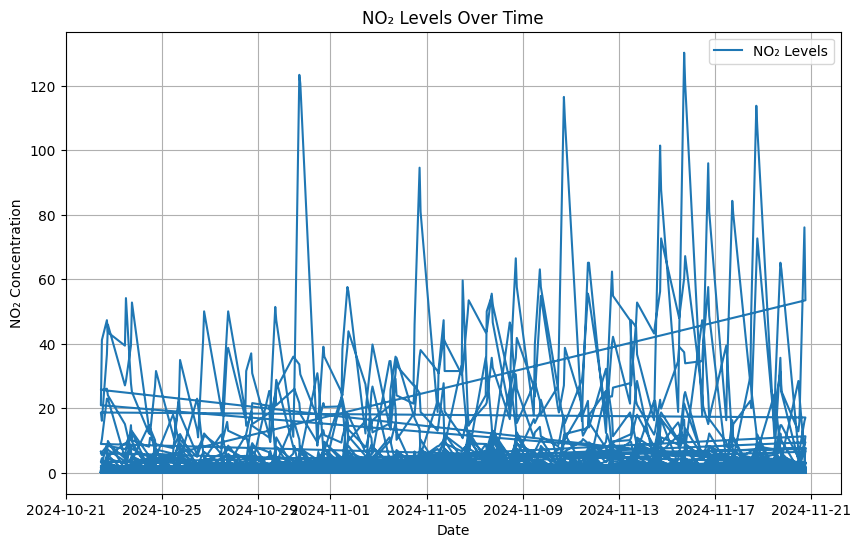

In [22]:
import matplotlib.pyplot as plt
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['no2'], label='NO₂ Levels')
plt.xlabel('Date')
plt.ylabel('NO₂ Concentration')
plt.title('NO₂ Levels Over Time')
plt.legend()
plt.grid()
plt.show()


In [23]:
Q1 = df['no2'].quantile(0.25)
Q3 = df['no2'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['no2'] < (Q1 - 1.5 * IQR)) | (df['no2'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 714


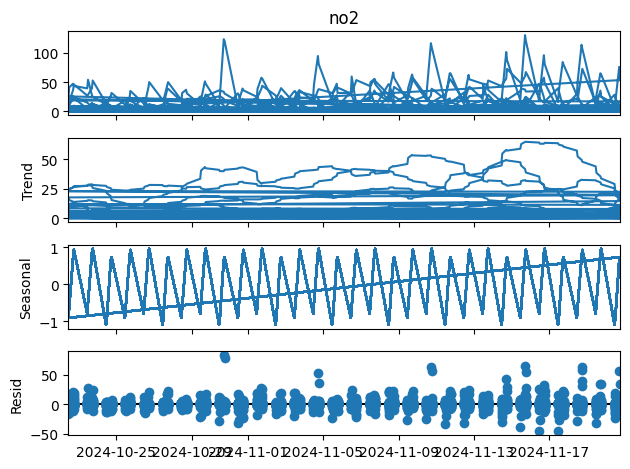

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.set_index('timestamp')['no2'], model='additive', period=12)
result.plot()
plt.show()

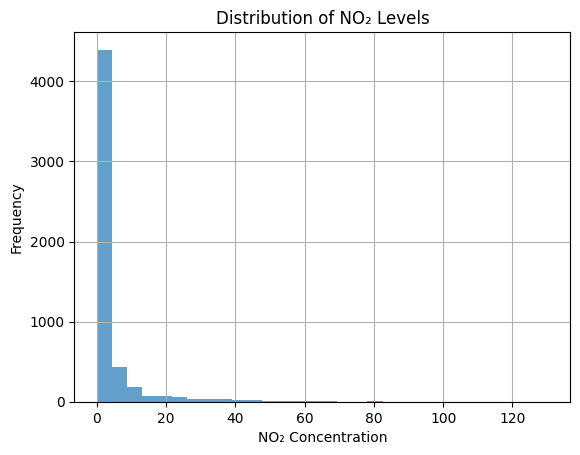

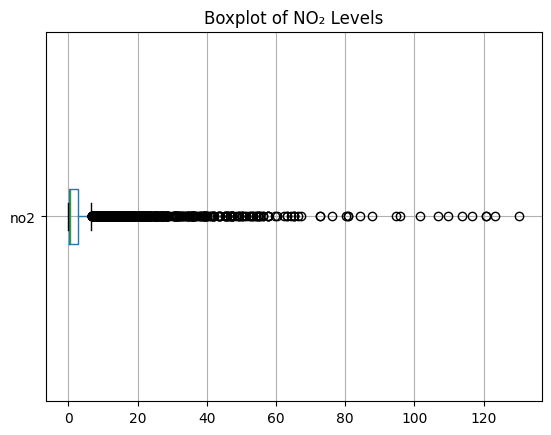

In [25]:
df['no2'].hist(bins=30, alpha=0.7)
plt.title('Distribution of NO₂ Levels')
plt.xlabel('NO₂ Concentration')
plt.ylabel('Frequency')
plt.show()

df.boxplot(column='no2', vert=False)
plt.title('Boxplot of NO₂ Levels')
plt.show()

In [26]:
#Due to the distribution of NO2 values, all the outliers will be appointed to the mean value
import pandas as pd

Q1 = df['no2'].quantile(0.25)
Q3 = df['no2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

no2_mean = df['no2'].mean()

df['no2'] = df['no2'].apply(
    lambda x: no2_mean if x < lower_bound or x > upper_bound else x
)

outliers = df[(df['no2'] < (Q1 - 1.5 * IQR)) | (df['no2'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


The predictions for the NO2 pollutant were giving negative values, the first step was to detect and deal with the outliers. Even after that, the results did not change, so the measure taken was to attribute 0 to any negative value for any pollutant using: `forecast['yhat'] = forecast['yhat'].clip(lower=0)`.

In [29]:
#Saving the cleaned dataset to use it later to train the model
df.to_csv('data/cleaned_dataset.csv', index=False)
print('Cleaned Dataset is saved')

Cleaned Dataset is saved
